In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [302]:
df = pd.read_csv('SalaryPrediction.csv')
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [304]:
df.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [305]:
df.isnull().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [306]:
df.Wage = df.Wage.replace(',','',regex= True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Wage      3907 non-null   float64
 1   Age       3907 non-null   int64  
 2   Club      3907 non-null   object 
 3   League    3907 non-null   object 
 4   Nation    3907 non-null   object 
 5   Position  3907 non-null   object 
 6   Apps      3907 non-null   int64  
 7   Caps      3907 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 244.3+ KB


In [307]:
df.duplicated().sum()

65

In [308]:
df = df.drop_duplicates()

In [309]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000.0,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000.0,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000.0,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000.0,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000.0,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,3400.0,19,Vigo,La Liga,ESP,Defender,0,0
3903,3200.0,18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,2900.0,18,Vigo,La Liga,ESP,Forward,0,0
3905,2700.0,18,Vigo,La Liga,ESP,Defender,0,0


In [310]:
df.describe()

,Wage,Age,Apps,Caps
count,3.842000e+03,3842.000000,3842.000000,3842.000000
mean,1.390327e+06,24.221499,142.426080,9.077564
std,2.605882e+06,4.914963,131.527544,20.657954
min,1.400000e+03,18.000000,0.000000,0.000000
25%,7.800000e+04,20.000000,19.000000,0.000000
50%,4.160000e+05,24.000000,119.000000,0.000000
75%,1.569500e+06,28.000000,226.000000,7.000000
max,4.642700e+07,41.000000,715.000000,180.000000


In [311]:
min_caps = df.Caps.quantile(0.1)
min_Apps = df.Apps.quantile(0.1)
df_noCA = df[(df.Caps<=min_caps) & (df.Apps<=min_Apps)]
df_noCA

,Wage,Age,Club,League,Nation,Position,Apps,Caps
785,2080000.0,18,Southampton,Premier League,BEL,Midfilder,0,0
1483,780000.0,18,Chelsea,Premier League,ENG,Midfilder,0,0
1636,650000.0,18,Sporting CP,Primiera Liga,CIV,Defender,0,0
1972,390000.0,19,Chelsea,Premier League,ENG,Defender,0,0
2000,364000.0,18,Tottenham,Premier League,ENG,Forward,0,0
...,...,...,...,...,...,...,...,...
3902,3400.0,19,Vigo,La Liga,ESP,Defender,0,0
3903,3200.0,18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,2900.0,18,Vigo,La Liga,ESP,Forward,0,0
3905,2700.0,18,Vigo,La Liga,ESP,Defender,0,0


In [312]:
df_noCA.Age.unique()

array([18, 19, 20, 21], dtype=int64)

In [313]:
df_mean_wage_by_age = df_noCA.groupby('Age')['Wage'].mean()
df_mean_wage_by_age

Age
18    53867.806268
19    52422.832370
20    54273.809524
21    52229.166667
Name: Wage, dtype: float64

In [314]:
df_noCA.groupby('League')['Wage'].sum()

League
Bundesliga            3932500.0
La Liga                702300.0
Ligue 1 Uber Eats      447500.0
Premier League       17708500.0
Primiera Liga         4782950.0
Serie A               3309250.0
Name: Wage, dtype: float64

In [315]:
df_club_noca_wage = df_noCA.groupby('Club')['Wage'].sum().rename_axis('Club').reset_index(name = 'NoCa_Sum Wage')
df_club_noca_wage = df_club_noca_wage.sort_values(by ='NoCa_Sum Wage', ascending = False).head(10)
df_club_noca_wage

,Club,NoCa_Sum Wage
78,Southampton,2990000.0
26,Chelsea,2678000.0
82,Tottenham,1508000.0
54,Man City,1331000.0
80,Sporting CP,1220500.0
50,Liverpool,1214000.0
19,Brentford,1092000.0
93,VfL Wolfsburg,850500.0
49,Leicester,842000.0
11,BRG,821000.0


In [316]:
df_caps = df[df.Caps>min_caps]
df_caps

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000.0,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000.0,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000.0,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000.0,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000.0,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3261,38000.0,28,PTM,Primiera Liga,KOR,Defender,238,13
3270,37500.0,21,Angers SCO,Ligue 1 Uber Eats,GAB,Forward,23,4
3395,29000.0,20,Gil Vicente,Primiera Liga,CRC,Midfilder,93,4
3533,26000.0,18,West Ham,Premier League,BER,Forward,0,2


In [317]:
df_apps = df[df.Apps>min_Apps]
df_apps

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000.0,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000.0,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000.0,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000.0,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000.0,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3886,12000.0,22,FC Porto,Primiera Liga,NGA,Forward,41,2
3887,11750.0,22,BVT,Primiera Liga,BRA,Defender,10,0
3888,11750.0,20,MRT,Primiera Liga,GNB,Defender,10,0
3892,7500.0,18,Sporting CP,Primiera Liga,GEO,Goalkeeper,6,0


In [318]:
df_new = df[(df.Apps>min_Apps) & (df.Caps>min_caps)]
df_new

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000.0,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000.0,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000.0,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000.0,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000.0,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3216,41500.0,19,Sampdoria,Serie A,VEN,Midfilder,60,1
3261,38000.0,28,PTM,Primiera Liga,KOR,Defender,238,13
3270,37500.0,21,Angers SCO,Ligue 1 Uber Eats,GAB,Forward,23,4
3395,29000.0,20,Gil Vicente,Primiera Liga,CRC,Midfilder,93,4


In [319]:
df_new.Age.unique()

array([23, 30, 35, 31, 29, 27, 22, 32, 34, 26, 36, 28, 25, 24, 19, 33, 21,
       18, 20, 37, 38, 39, 41, 40], dtype=int64)

In [320]:
df_new.describe()

,Wage,Age,Apps,Caps
count,1.374000e+03,1374.000000,1374.000000,1374.000000
mean,3.028002e+06,27.129549,229.534934,25.372635
std,3.685085e+06,4.161956,119.092049,27.930686
min,1.200000e+04,18.000000,1.000000,1.000000
25%,7.435000e+05,24.000000,141.000000,5.000000
50%,1.879000e+06,27.000000,211.000000,16.000000
75%,3.900000e+06,30.000000,309.000000,36.000000
max,4.642700e+07,41.000000,715.000000,180.000000


In [321]:
# Thống kê trung bình lương ở các độ tuổi kiếm được
df.groupby('Age')['Wage'].mean()

Age
18    1.057802e+05
19    2.703353e+05
20    4.169186e+05
21    8.716305e+05
22    1.183293e+06
23    1.595604e+06
24    1.444058e+06
25    1.816926e+06
26    1.935016e+06
27    2.059671e+06
28    2.327022e+06
29    2.515486e+06
30    2.645580e+06
31    2.775508e+06
32    2.062869e+06
33    2.199206e+06
34    2.316517e+06
35    2.530123e+06
36    3.775119e+06
37    1.721643e+06
38    1.431333e+06
39    9.752857e+05
40    1.164000e+06
41    7.622500e+05
Name: Wage, dtype: float64

In [322]:
# Thông kê mức lương trung bình được trả cho các vị trí
df.groupby('Position')['Wage'].mean()

Position
Defender      1.332659e+06
Forward       1.352223e+06
Goalkeeper    1.019950e+06
Midfilder     1.630598e+06
Name: Wage, dtype: float64

In [323]:
# Xử lý các quốc gia của các châu lục
country_on_continent = {
    'FRA': 'Europe',
    'BRA': 'South America',
    'ARG': 'South America',
    'BEL': 'Europe',
    'ESP': 'Europe',
    'AUT': 'Europe',
    'EGY': 'Africa',
    'ENG': 'Europe',
    'NOR': 'Europe',
    'GER': 'Europe',
    'SVN': 'Europe',
    'SEN': 'Africa',
    'POL': 'Europe',
    'CRO': 'Europe',
    'NED': 'Europe',
    'POR': 'Europe',
    'ITA': 'Europe',
    'SRB': 'Europe',
    'ALG': 'Africa',
    'CIV': 'Africa',
    'DEN': 'Europe',
    'CRC': 'North America',
    'KOR': 'Asia',
    'GHA': 'Africa',
    'URU': 'South America',
    'MAR': 'Africa',
    'GAB': 'Africa',
    'SWE': 'Europe',
    'SCO': 'Europe',
    'COL': 'South America',
    'TUR': 'Europe',
    'BIH': 'Europe',
    'UKR': 'Europe',
    'USA': 'North America',
    'CMR': 'Africa',
    'CAN': 'North America',
    'GUI': 'Africa',
    'WAL': 'Europe',
    'MLI': 'Africa',
    'SUI': 'Europe',
    'CTA': 'North America',
    'DOM': 'North America',
    'NIR': 'Europe',
    'MEX': 'North America',
    'NGA': 'Africa',
    'VEN': 'South America',
    'CZE': 'Europe',
    'SVK': 'Europe',
    'JAM': 'North America',
    'CHI': 'South America',
    'ARM': 'Asia',
    'NZL': 'Oceania',
    'ZAM': 'Africa',
    'JPN': 'Asia',
    'RUS': 'Europe',
    'PAR': 'South America',
    'ALB': 'Europe',
    'IRL': 'Europe',
    'MNE': 'Europe',
    'KOS': 'Europe',
    'FIN': 'Europe',
    'GRE': 'Europe',
    'AUS': 'Oceania',
    'BFA': 'Africa',
    'ECU': 'South America',
    'ISR': 'Asia',
    'HUN': 'Europe',
    'IRN': 'Asia',
    'COD': 'Africa',
    'TOG': 'Africa',
    'ROU': 'Europe',
    'UZB': 'Asia',
    'MKD': 'Europe',
    'GNB': 'Africa',
    'MOZ': 'Africa',
    'GRN': 'North America',
    'GEO': 'Asia',
    'ZIM': 'Africa',
    'TUN': 'Africa',
    'SUR': 'South America',
    'LUX': 'Europe',
    'GAM': 'Africa',
    'EQG': 'Africa',
    'HON': 'North America',
    'MSR': 'North America',
    'BUL': 'Europe',
    'ANG': 'Africa',
    'RSA': 'Africa',
    'BDI': 'Africa',
    'CPV': 'Africa',
    'CYP': 'Europe',
    'PER': 'South America',
    'SLE': 'Africa',
    'GLP': 'North America',
    'BEN': 'Africa',
    'PHI': 'Asia',
    'GUF': 'South America',
    'LBY': 'Africa',
    'COM': 'Africa',
    'CGO': 'Africa',
    'ISL': 'Europe',
    'MAD': 'Africa',
    'LTU': 'Europe',
    'PAN': 'North America',
    'LVA': 'Europe',
    'CUW': 'North America',
    'EST': 'Europe',
    'IRQ': 'Asia',
    'GUY': 'South America',
    'PLE': 'Asia',
    'THA': 'Asia',
    'CHN': 'Asia',
    'BER': 'North America',
    'SIN': 'Asia'
}
pd.options.mode.copy_on_write = True
df['Continent'] = df['Nation'].map(country_on_continent)
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps,Continent
0,46427000.0,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57,Europe
1,42125000.0,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119,South America
2,34821000.0,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162,South America
3,19959000.0,31,R. Madrid,La Liga,BEL,Forward,443,120,Europe
4,19500000.0,31,Man UFC,Premier League,ESP,Goalkeeper,480,45,Europe
...,...,...,...,...,...,...,...,...,...
3902,3400.0,19,Vigo,La Liga,ESP,Defender,0,0,Europe
3903,3200.0,18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0,South America
3904,2900.0,18,Vigo,La Liga,ESP,Forward,0,0,Europe
3905,2700.0,18,Vigo,La Liga,ESP,Defender,0,0,Europe


In [324]:
# Thống kê trung bình mức lương nhận được của các cầu thủ các châu lục khác nhau
df_continent = df.groupby('Continent')['Wage'].mean().reset_index(name = 'Mean')
df_continent

,Continent,Mean
0,Africa,1.232470e+06
1,Asia,9.743871e+05
2,Europe,1.375748e+06
3,North America,1.293686e+06
4,Oceania,9.266667e+05
5,South America,1.715667e+06


In [325]:
# Thống kê tổng lương của các mùa giải
df.groupby('League')['Wage'].sum()

League
Bundesliga           7.822102e+08
La Liga              9.027466e+08
Ligue 1 Uber Eats    5.739450e+08
Premier League       2.042386e+09
Primiera Liga        1.451682e+08
Serie A              8.951802e+08
Name: Wage, dtype: float64

In [326]:
# Thống kê tổng lương của các cầu thủ dưới 30 tuổi và trên 30 tuổi
tren_30 = df.loc[df['Age'] >= 30]
duoi_30 = df.loc[df['Age'] <30 ]
tong_luong_tren_30 = tren_30.Wage.sum()
tong_luong_duoi_30 = duoi_30.Wage.sum()
tong_luong_tren_30, tong_luong_duoi_30

(1572188500.0, 3769447500.0)

In [327]:
# Thống kê trung bình nhận lương của các vị trí trong các giải
df.groupby(['Position', 'League'])['Wage'].mean()

Position    League           
Defender    Bundesliga           1.488802e+06
            La Liga              1.454977e+06
            Ligue 1 Uber Eats    1.007791e+06
            Premier League       2.340407e+06
            Primiera Liga        1.804050e+05
            Serie A              1.213990e+06
Forward     Bundesliga           1.386279e+06
            La Liga              1.733770e+06
            Ligue 1 Uber Eats    1.615704e+06
            Premier League       2.227952e+06
            Primiera Liga        1.905673e+05
            Serie A              1.586152e+06
Goalkeeper  Bundesliga           9.402969e+05
            La Liga              1.180052e+06
            Ligue 1 Uber Eats    1.009531e+06
            Premier League       1.624376e+06
            Primiera Liga        1.428866e+05
            Serie A              8.887838e+05
Midfilder   Bundesliga           1.619059e+06
            La Liga              1.751825e+06
            Ligue 1 Uber Eats    1.357739e+06
    

In [328]:
# thống kê tổng lương phải trả nhiều nhất của các câu lạc bộ trong top 10 
df_club_wage = df.groupby('Club')['Wage'].sum().rename_axis('Club').reset_index(name = 'Sum Wage')
df_club_wage = df_club_wage.sort_values(by ='Sum Wage', ascending = False).head(10)
df_club_wage

,Club,Sum Wage
30,Chelsea,228356000.0
73,PSG,220933500.0
64,Man UFC,212620000.0
76,R. Madrid,209962000.0
41,FC Bayern,200285000.0
59,Liverpool,184554000.0
63,Man City,171839000.0
15,Barcelona,151526500.0
2,A. Madrid,139234000.0
54,Juventus,131845500.0


In [329]:
# thống kê tổng lương phải trả nhiều nhất cho độ tuổi và vị trí của các câu lạc bộ trong top 15
df_club_wage_age = df.groupby(['Club', 'Age', 'Position'])['Wage'].sum().rename_axis(['Club', 'Age', 'Position']).reset_index(name = 'Sum Wage')
df_club_wage_age = df_club_wage_age.sort_values(by ='Sum Wage', ascending = False).head(15)
df_club_wage_age

,Club,Age,Position,Sum Wage
1804,PSG,23,Forward,46427000.0
1816,PSG,30,Midfilder,42125000.0
1567,Man City,31,Midfilder,36660000.0
1817,PSG,35,Forward,34821000.0
362,Barcelona,25,Midfilder,31038000.0
1594,Man UFC,29,Defender,28600000.0
1559,Man City,22,Forward,28080000.0
1459,Liverpool,30,Forward,27560000.0
998,FC Bayern,26,Midfilder,27512000.0
1891,R. Madrid,30,Defender,26794000.0


In [330]:
df_club_wage.describe()

,Sum Wage
count,1.000000e+01
mean,1.851156e+08
std,3.496703e+07
min,1.318455e+08
25%,1.566046e+08
50%,1.924195e+08
75%,2.119555e+08
max,2.283560e+08


C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_24008\1409751868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Club', y='Sum Wage', data=df_club_wage, palette='viridis')


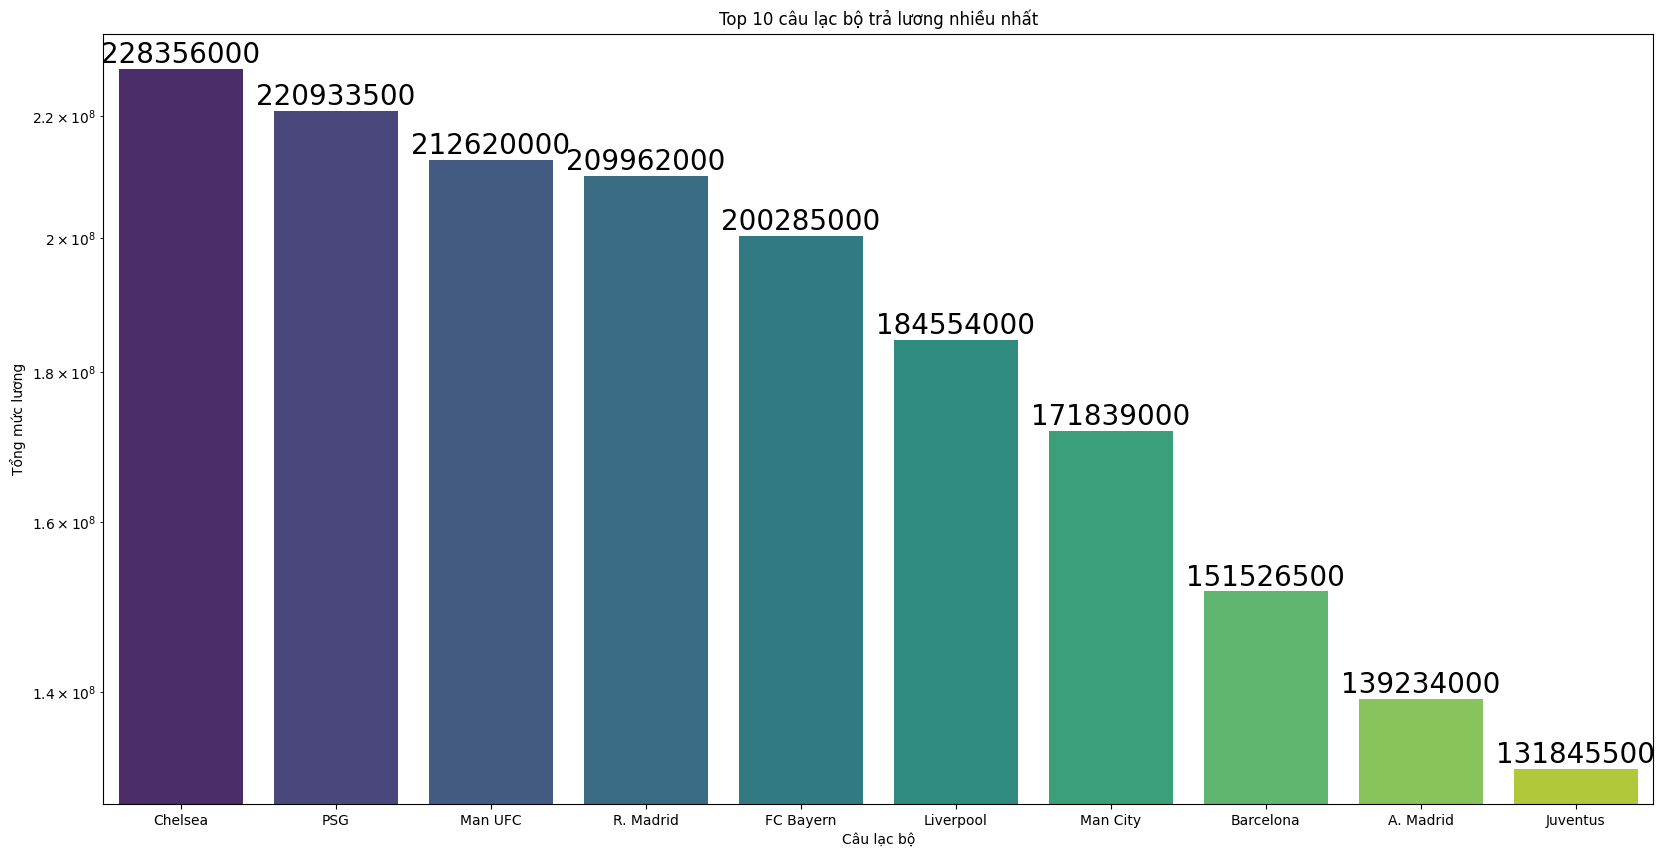

In [331]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Club', y='Sum Wage', data=df_club_wage, palette='viridis')
ax.set_yscale('log')
ax.set_xlabel('Câu lạc bộ')
ax.set_ylabel('Tổng mức lương')
ax.set_title('Top 10 câu lạc bộ trả lương nhiều nhất')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=20)
plt.show()

Text(0.5, 1.0, 'Biểu đồ tròn')

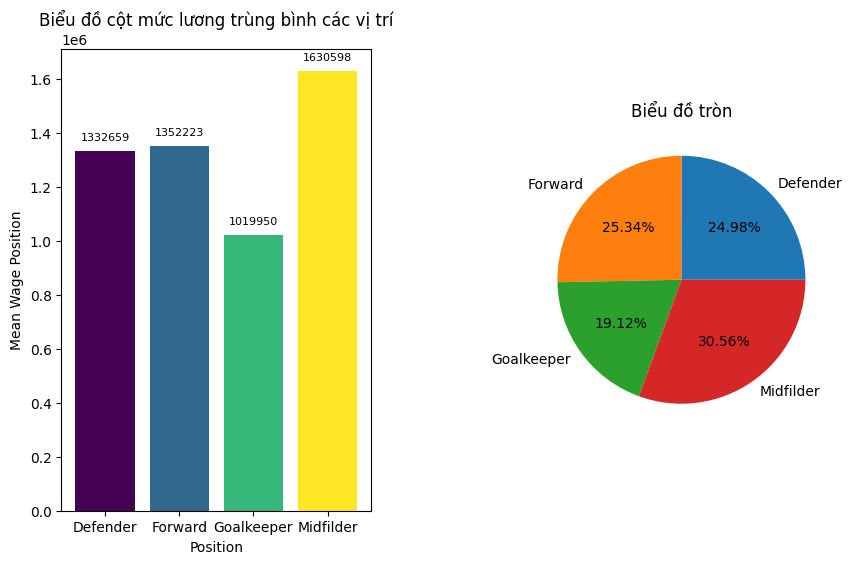

In [332]:
# Biểu đồ thống kê mức lương trung bình cho từng vị trí
df_mean_position = df.groupby('Position')['Wage'].mean().rename_axis('Position').reset_index(name = 'Mean Wage')
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)  
colors = plt.cm.viridis(np.linspace(0, 1, len(df_mean_position)))
axes[0].bar(df_mean_position['Position'], df_mean_position['Mean Wage'],color=colors)
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=8)
axes[0].set_title('Biểu đồ cột mức lương trùng bình các vị trí')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Mean Wage Position')
axes[1].pie(df_mean_position['Mean Wage'], labels=df_mean_position['Position'], autopct='%0.2f%%')
axes[1].set_title('Biểu đồ tròn')

In [333]:
df_sum_wage_position_league = df.groupby(['Position', 'League'])['Wage'].sum().reset_index()
df_sum_wage_position_league

,Position,League,Wage
0,Defender,Bundesliga,321581250.0
1,Defender,La Liga,323004850.0
2,Defender,Ligue 1 Uber Eats,173340000.0
3,Defender,Premier League,751270500.0
4,Defender,Primiera Liga,46544500.0
5,Defender,Serie A,319279250.0
6,Forward,Bundesliga,141400500.0
7,Forward,La Liga,190714700.0
8,Forward,Ligue 1 Uber Eats,158339000.0
9,Forward,Premier League,345332500.0


In [334]:
df_sum_wage_position_league_pv = df_sum_wage_position_league.pivot(index='Position', columns='League', values='Wage')
df_sum_wage_position_league_pv

League,Bundesliga,La Liga,Ligue 1 Uber Eats,Premier League,Primiera Liga,Serie A
Position,,,,,,
Defender,321581250.0,323004850.0,173340000.0,751270500.0,46544500.0,319279250.0
Forward,141400500.0,190714700.0,158339000.0,345332500.0,39638000.0,234750500.0
Goalkeeper,60179000.0,68443000.0,49467000.0,183554500.0,10144950.0,65770000.0
Midfilder,259049500.0,320584000.0,192799000.0,762228250.0,48840750.0,275380500.0


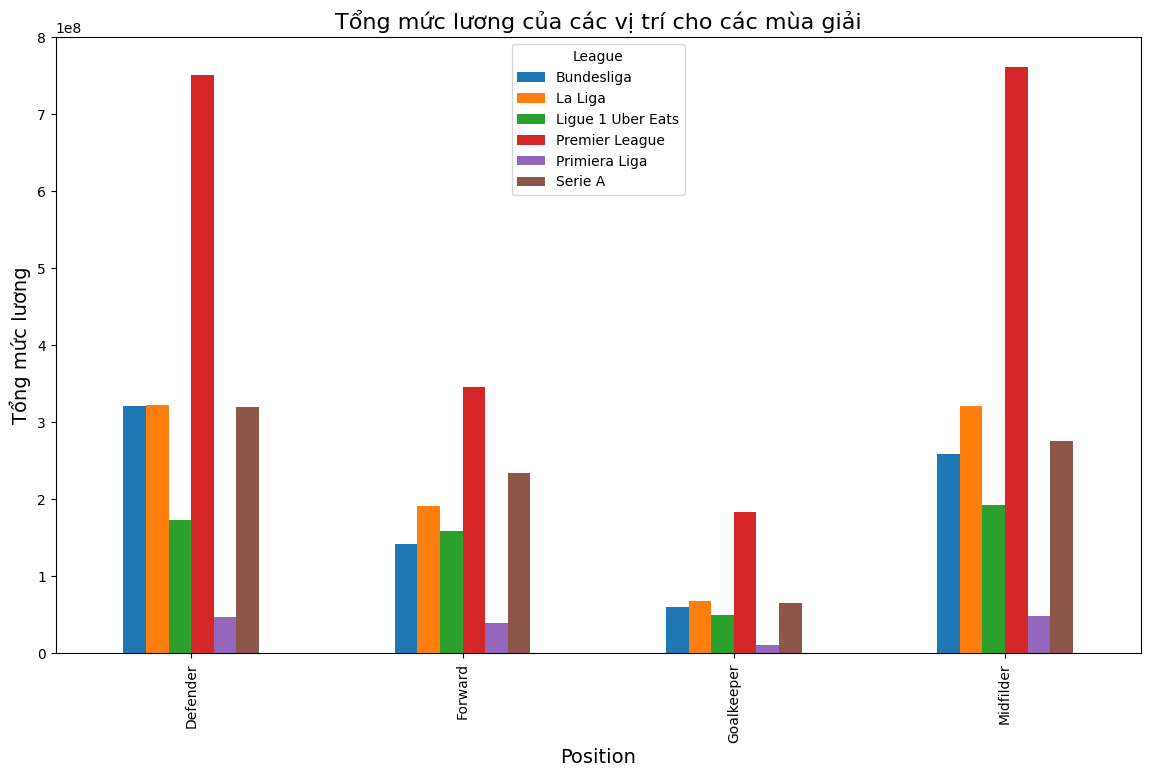

In [335]:
fig, ax = plt.subplots(figsize=(14, 8))
df_sum_wage_position_league_pv.plot(kind='bar',ax = ax)
plt.title('Tổng mức lương của các vị trí cho các mùa giải', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Tổng mức lương', fontsize=14)
plt.legend(title='League')
plt.show()

Text(0.5, 1.0, 'Biểu đồ tròn')

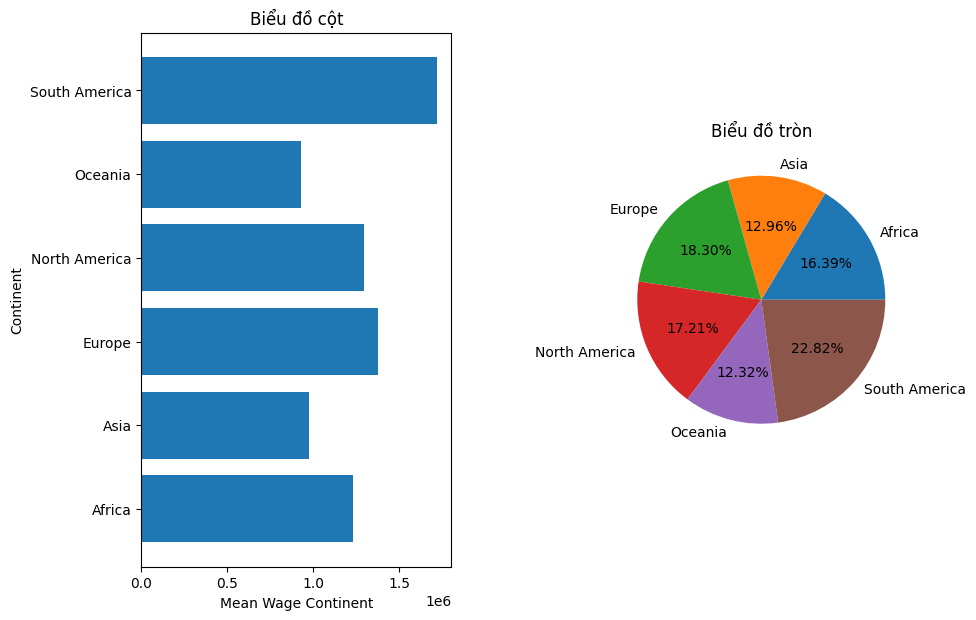

In [336]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5, top= 1.0) 
axes[0].barh(df_continent['Continent'], df_continent['Mean'])
axes[0].set_title('Biểu đồ cột')
axes[0].set_ylabel('Continent')
axes[0].set_xlabel('Mean Wage Continent')
axes[1].pie(df_continent['Mean'], labels=df_continent['Continent'], autopct='%0.2f%%')
axes[1].set_title('Biểu đồ tròn')

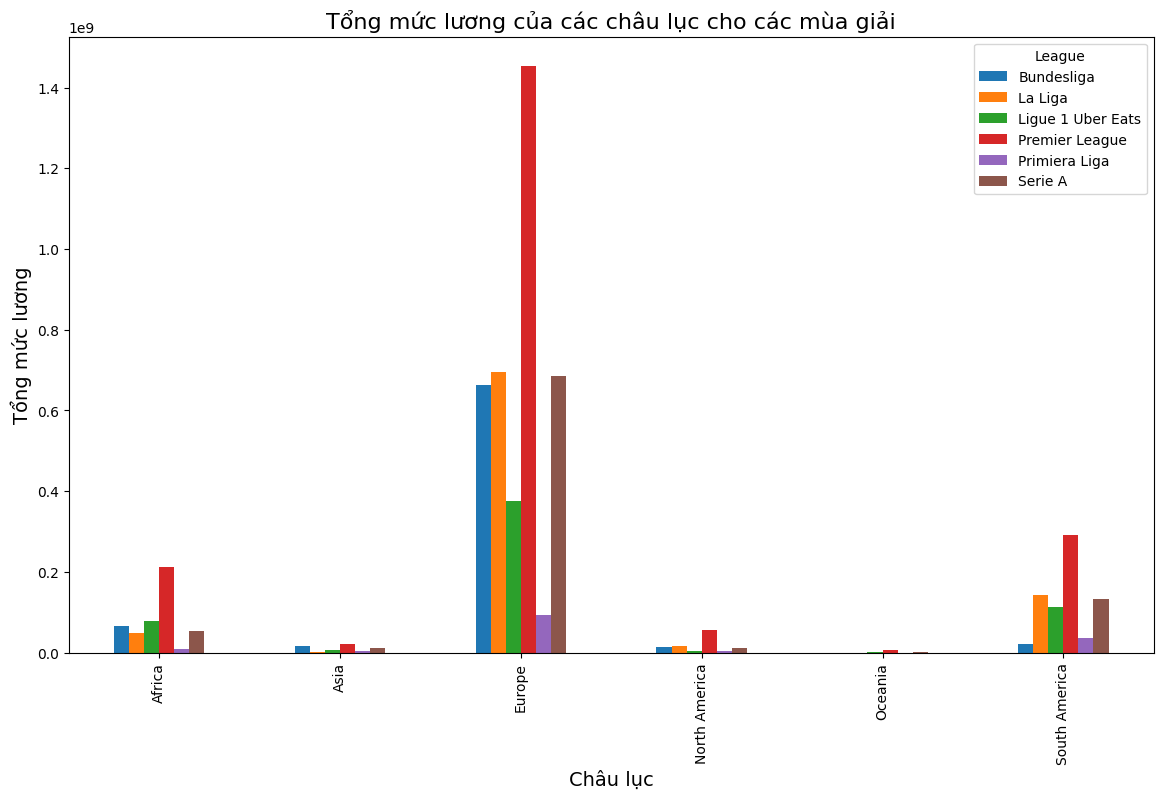

In [337]:
fig, ax = plt.subplots(figsize=(14, 8))
df_mean_wage_continent_league = df.groupby(['Continent', 'League'])['Wage'].sum().reset_index()
df_mean_wage_continent_league_pv = df_mean_wage_continent_league.pivot(index='Continent', columns='League', values='Wage')
df_mean_wage_continent_league_pv.plot(kind='bar',ax = ax)
plt.title('Tổng mức lương của các châu lục cho các mùa giải', fontsize=16)
plt.xlabel('Châu lục', fontsize=14)
plt.ylabel('Tổng mức lương', fontsize=14)
plt.legend(title='League')
plt.show()

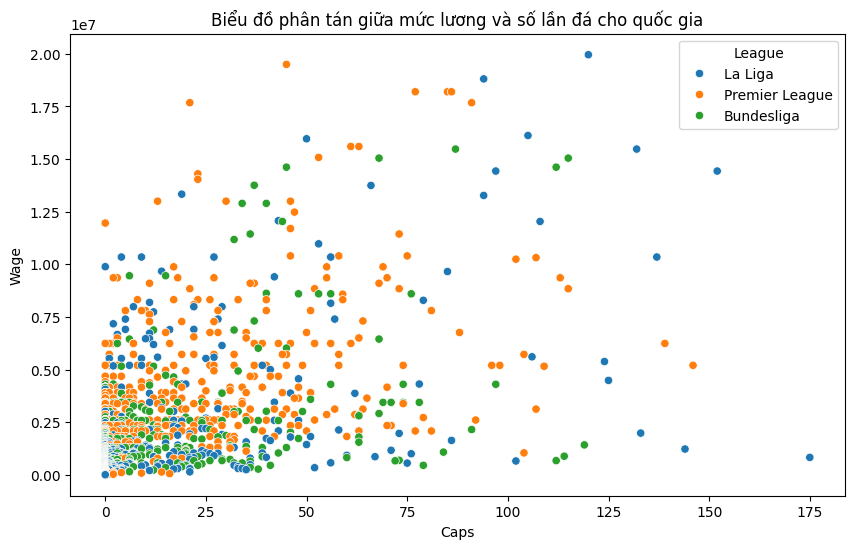

In [338]:
selected_leagues = ['La Liga', 'Premier League', 'Bundesliga']
df_league = df[df['League'].isin(selected_leagues)]
fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(x='Caps', y='Wage', hue='League', data=df_league, ax=ax)
ax.set_title('Biểu đồ phân tán giữa mức lương và số lần đá cho quốc gia')
plt.show()

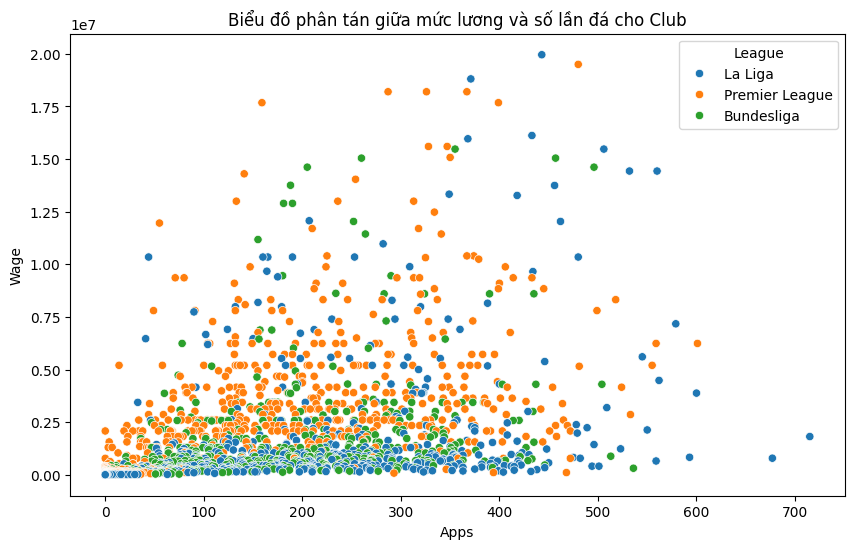

In [339]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(x='Apps', y='Wage', hue='League', data=df_league, ax=ax)
ax.set_title('Biểu đồ phân tán giữa mức lương và số lần đá cho Club')
plt.show()

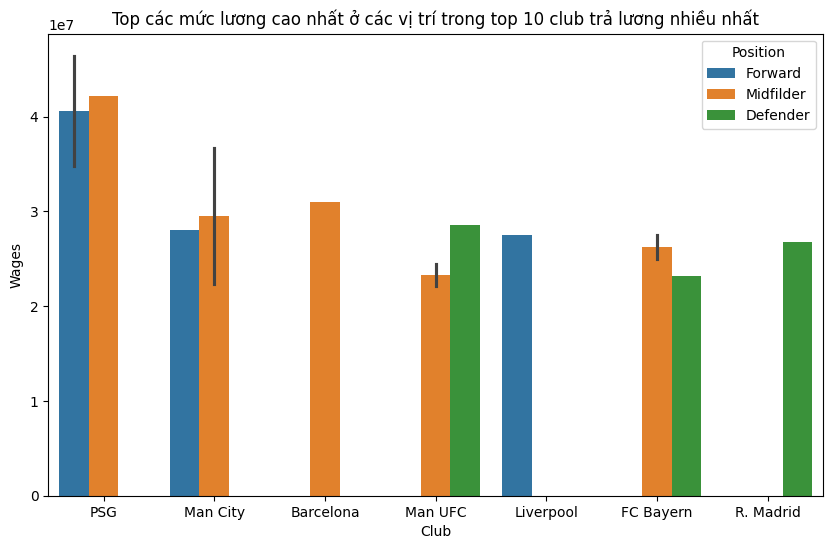

In [340]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Club', y='Sum Wage', hue='Position', data=df_club_wage_age, ax=ax)
ax.set_title('Top các mức lương cao nhất ở các vị trí trong top 10 club trả lương nhiều nhất')
ax.set_xlabel('Club')
ax.set_ylabel('Wages')
plt.show()

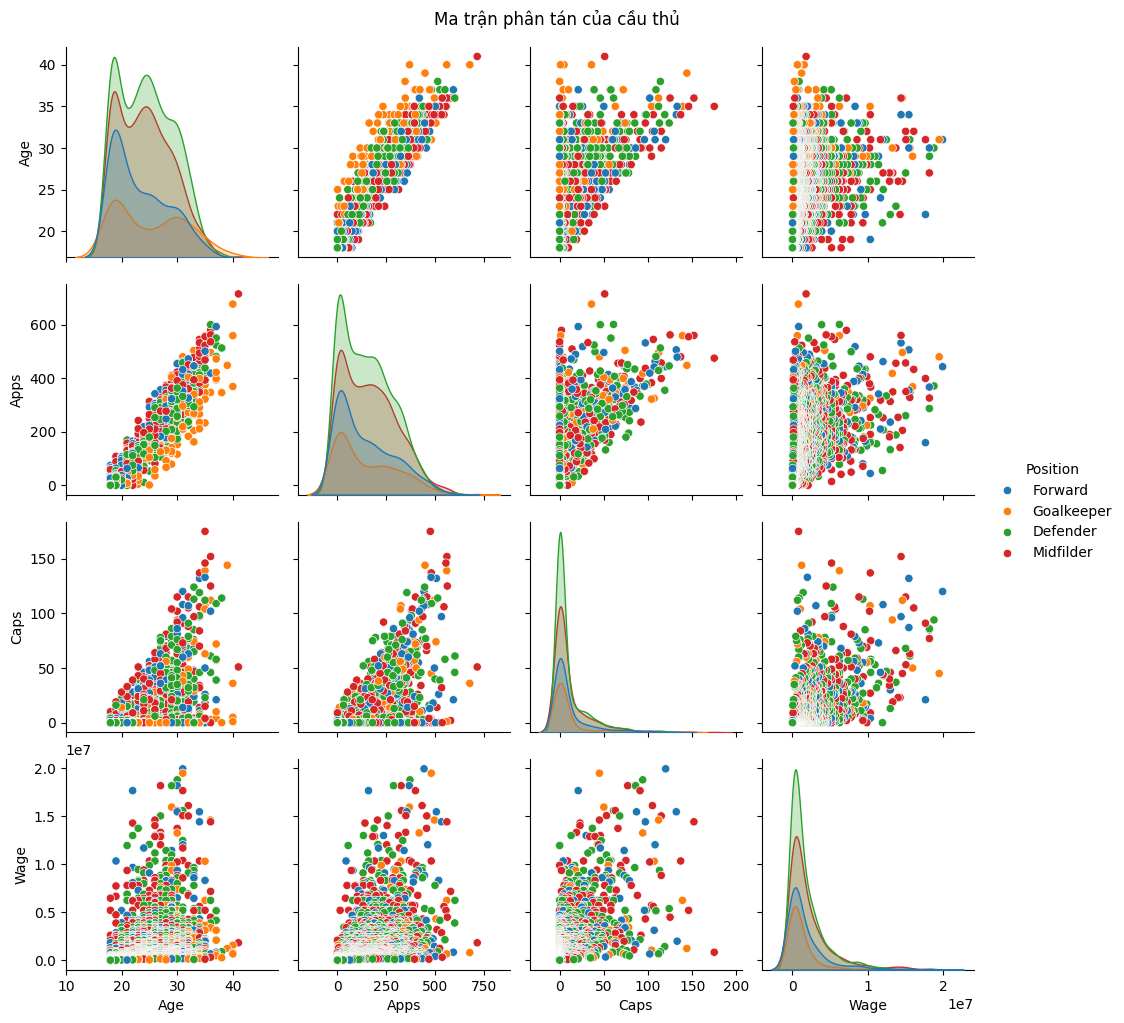

In [344]:
df_matrix = df_league[['Age', 'Apps', 'Caps', 'Wage', 'Position']]
sns.pairplot(df_matrix, hue='Position')
plt.suptitle('Ma trận phân tán của cầu thủ', y=1.02)
plt.show()

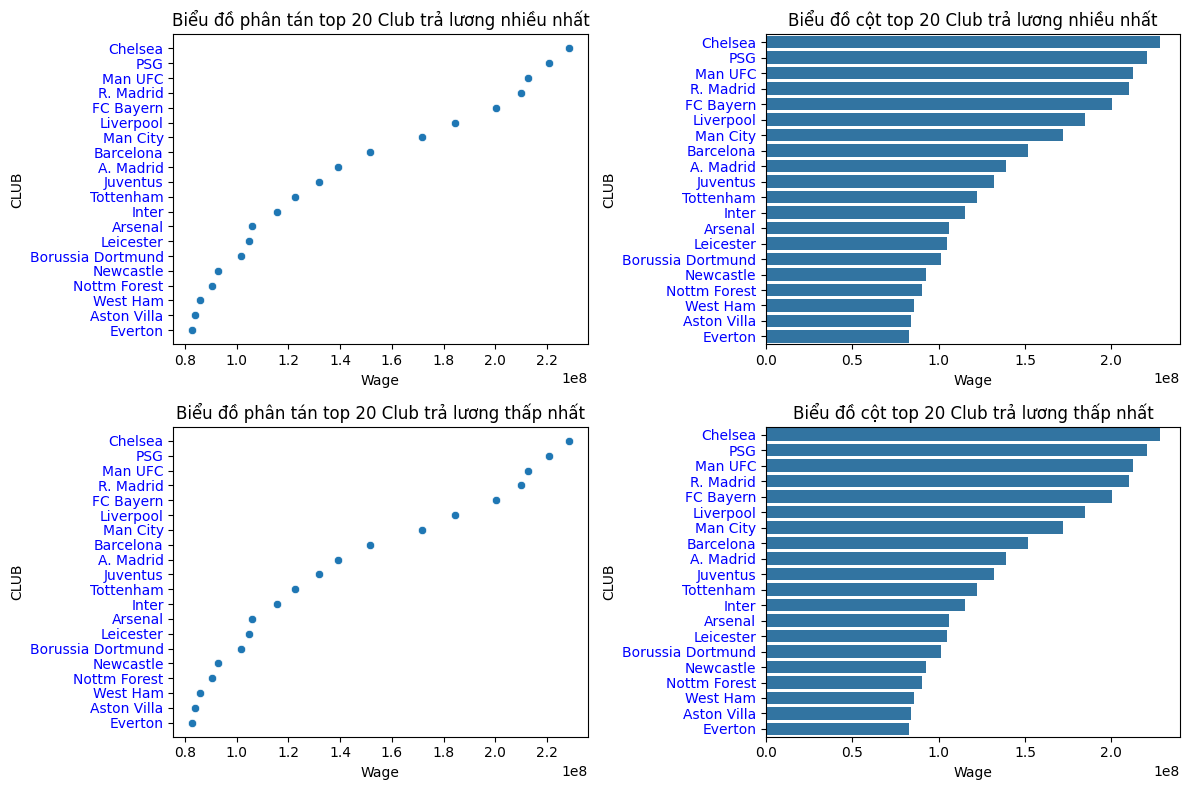

In [357]:
tong_luong_max = df.groupby('Club')['Wage'].sum().sort_values(ascending=False).reset_index().head(20)
tong_luong_min = tong_luong_max.tail(20)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# biểu đồ phân tán với top 20 club tổng lương cao
scatter_top = sns.scatterplot(x='Wage', y='Club', data =tong_luong_max,  ax=axes[0, 0])
scatter_top.set_title('Biểu đồ phân tán top 20 Club trả lương nhiều nhất')
scatter_top.set_ylabel('CLUB')
scatter_top.tick_params(axis='y', labelcolor='blue')

# Biểu đồ cột top 20 club tổng lương cao
bar_top = sns.barplot(x='Wage', y='Club',data =tong_luong_max, ax=axes[0, 1])
bar_top.set_title('Biểu đồ cột top 20 Club trả lương nhiều nhất')
bar_top.set_ylabel('CLUB')
bar_top.tick_params(axis='y', labelcolor='blue')

# biểu đồ phân tán với top 20 club tổng lương thấp
scatter_bottom = sns.scatterplot(x='Wage', y='Club',data =tong_luong_min, ax=axes[1, 0])
scatter_bottom.set_title('Biểu đồ phân tán top 20 Club trả lương thấp nhất')
scatter_bottom.set_ylabel('CLUB')
scatter_bottom.tick_params(axis='y', labelcolor='blue')

# Biểu đồ cột top 20 club tổng lương thấp
bar_bottom = sns.barplot(x='Wage', y='Club',data =tong_luong_min, ax=axes[1, 1])
bar_bottom.set_title('Biểu đồ cột top 20 Club trả lương thấp nhất')
bar_bottom.set_ylabel('CLUB')
bar_bottom.tick_params(axis='y', labelcolor='blue')
plt.tight_layout()
plt.show()

In [358]:
# Machine Learning

In [359]:
le = LabelEncoder()
dfe = df
dfe.Club = le.fit_transform(df.Club)
dfe.League = le.fit_transform(df.League)
dfe.Nation = le.fit_transform(df.Nation)
dfe.Position = le.fit_transform(df.Position)
dfe.Continent = le.fit_transform(df.Continent)
dfe

,Wage,Age,Club,League,Nation,Position,Apps,Caps,Continent
0,46427000.0,23,73,2,40,1,190,57,2
1,42125000.0,30,73,2,13,3,324,119,5
2,34821000.0,35,73,2,3,1,585,162,5
3,19959000.0,31,76,1,8,1,443,120,2
4,19500000.0,31,64,3,37,2,480,45,2
...,...,...,...,...,...,...,...,...,...
3902,3400.0,19,112,1,37,0,0,0,2
3903,3200.0,18,45,4,13,2,0,0,5
3904,2900.0,18,112,1,37,1,0,0,2
3905,2700.0,18,112,1,37,0,0,0,2


In [360]:
X = df[['Age','Club', 'League', 'Nation', 'Position', 'Continent']].values
X

array([[ 23,  73,   2,  40,   1,   2],
       [ 30,  73,   2,  13,   3,   5],
       [ 35,  73,   2,   3,   1,   5],
       ...,
       [ 18, 112,   1,  37,   1,   2],
       [ 18, 112,   1,  37,   0,   2],
       [ 18, 112,   1,  37,   0,   2]], dtype=int64)

In [361]:
cot_chuyen_doi = ['Club', 'League', 'Nation', 'Position', 'Continent']
ohe = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), cot_chuyen_doi)],
    remainder='passthrough'
)
X = ohe.fit_transform(dfe)
X

<3842x245 sparse matrix of type '<class 'numpy.float64'>'
	with 29107 stored elements in Compressed Sparse Row format>

In [362]:
Y = dfe.Wage
Y

0       46427000.0
1       42125000.0
2       34821000.0
3       19959000.0
4       19500000.0
           ...    
3902        3400.0
3903        3200.0
3904        2900.0
3905        2700.0
3906        1400.0
Name: Wage, Length: 3842, dtype: float64

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [364]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
score = reg.score(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Score:{score*100}")

Score:100.0


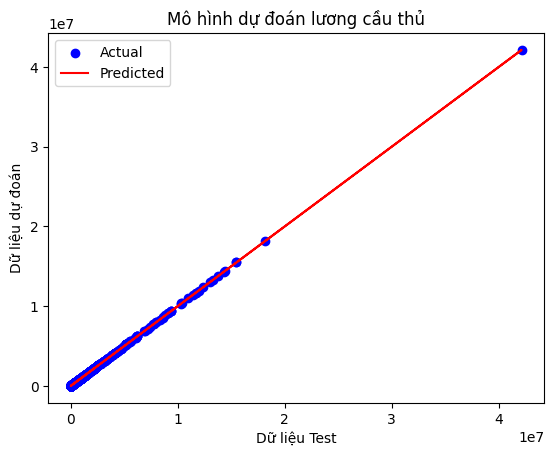

In [371]:
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.plot(y_test, y_pred, color='red', label='Predicted')
plt.title('Mô hình dự đoán lương cầu thủ')
plt.xlabel('Dữ liệu Test')
plt.ylabel('Dữ liệu dự đoán')
plt.legend()
plt.show()